## Data Exploration

The goal of this notebook is to explore and prepare for training URL and Apps datasets.

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 

import warnings
warnings.filterwarnings('ignore')

In [59]:
url_df = pd.read_csv("./data/URL.csv", header=None)
url_df.columns = ['index', 'url', 'category']
url_df.dropna(inplace=True)
url_df.head()

,index,url,category
0,1,http://www.liquidgeneration.com/,Adult
1,2,http://www.onlineanime.org/,Adult
2,3,http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...,Adult
3,4,http://www.galeon.com/kmh/,Adult
4,5,http://www.fanworkrecs.com/,Adult


In [60]:
url_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1562975 entries, 0 to 1562977
Data columns (total 3 columns):
index       1562975 non-null int64
url         1562975 non-null object
category    1562975 non-null object
dtypes: int64(1), object(2)
memory usage: 47.7+ MB


In [97]:
url_df.shape

(1562975, 5)

([<matplotlib.axis.XTick at 0x15eaa5b5518>,
 <a list of 15 Text xticklabel objects>)

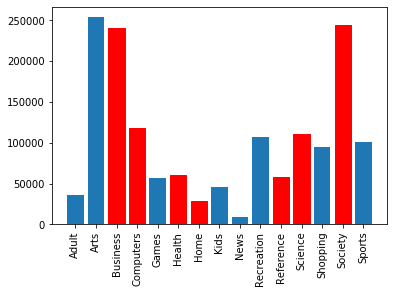

In [114]:
cnt = Counter(url_df['category'])
idx = range(len(cnt))
barlist = plt.bar(idx, cnt.values())
barlist[2].set_color('r') #legend: red (work), blue (play)
barlist[3].set_color('r')
barlist[5].set_color('r')
barlist[6].set_color('r')
barlist[10].set_color('r')
barlist[11].set_color('r')
barlist[13].set_color('r')
plt.xticks(idx, cnt.keys(), rotation=90)

In [90]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
stop_words = set(stopwords.words('english'))
stop_words.update(['http', 'https', 'www', 'com', 'html', 'org', 'ru', 'jp', 'uk', 'ca', '//'])

In [91]:
tokens = tokenizer.tokenize(url_df.loc[2,'url'])
tokens

['http',
 'www',
 'ceres',
 'dti',
 'ne',
 'jp',
 'nekoi',
 'senno',
 'senfirst',
 'html']

Let's tokenize the URLs using the NLTK RegEx tokenizer and remove common stop words:

In [69]:
url_df['url_tokens'] = url_df['url'].apply(lambda x: tokenizer.tokenize(x))
url_df['url_tokens_filtered'] = url_df['url_tokens'].apply(lambda sent: [word for word in sent if word not in stop_words])
url_df.head()

,index,url,category,url_tokens,url_tokens_filtered
0,1,http://www.liquidgeneration.com/,Adult,"[http, www, liquidgeneration, com]",[liquidgeneration]
1,2,http://www.onlineanime.org/,Adult,"[http, www, onlineanime, org]",[onlineanime]
2,3,http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...,Adult,"[http, www, ceres, dti, ne, jp, nekoi, senno, ...","[ceres, dti, ne, nekoi, senno, senfirst]"
3,4,http://www.galeon.com/kmh/,Adult,"[http, www, galeon, com, kmh]","[galeon, kmh]"
4,5,http://www.fanworkrecs.com/,Adult,"[http, www, fanworkrecs, com]",[fanworkrecs]


In [106]:
label_df = pd.DataFrame({'category_name': list(cnt.keys()), 
                         'workplay_name':  ['p','p','w','w','p','w','w','p','p','p','w','w','p','w','p'],
                         'workplay_label': ['0','0','1','1','0','1','1','0','0','0','1','1','0','1','0'],
                        })
label_df.head(15)

,category_name,workplay_name,workplay_label
0,Adult,p,0
1,Arts,p,0
2,Business,w,1
3,Computers,w,1
4,Games,p,0
5,Health,w,1
6,Home,w,1
7,Kids,p,0
8,News,p,0
9,Recreation,p,0


Let's load a user session (example of input test data):

In [80]:
url_session_df = pd.read_csv("./data/URLResult.csv")
url_session_df.drop(url_session_df.columns[0], inplace=True, axis=1)
url_session_df.columns = ['index', 'url', 'category']
url_session_df.head()

,index,url,category
0,1,https://www.google.com/search?q=test&oq=test&a...,work
1,2,https://www.google.com/search?q=test&source=ln...,work
2,3,https://www.theverge.com/2019/7/1/20676939/nas...,work
3,4,https://www.theverge.com/2019/7/1/20676939/nas...,work
4,5,https://www.theverge.com/2019/7/1/20676939/nas...,work


In [92]:
url_session_df['url_tokens'] = url_session_df['url'].apply(lambda x: tokenizer.tokenize(x))
url_session_df['url_tokens_filtered'] = url_session_df['url_tokens'].apply(lambda sent: [word for word in sent if word not in stop_words and len(word) > 2])
url_session_df.head()

,index,url,category,url_tokens,url_tokens_filtered
0,1,https://www.google.com/search?q=test&oq=test&a...,work,"[https, www, google, com, search, q, test, oq,...","[google, search, test, test, aqs, chrome, sour..."
1,2,https://www.google.com/search?q=test&source=ln...,work,"[https, www, google, com, search, q, test, sou...","[google, search, test, source, lnms, tbm, nws,..."
2,3,https://www.theverge.com/2019/7/1/20676939/nas...,work,"[https, www, theverge, com, nasa, orion, crew,...","[theverge, nasa, orion, crew, capsule, launch,..."
3,4,https://www.theverge.com/2019/7/1/20676939/nas...,work,"[https, www, theverge, com, nasa, orion, crew,...","[theverge, nasa, orion, crew, capsule, launch,..."
4,5,https://www.theverge.com/2019/7/1/20676939/nas...,work,"[https, www, theverge, com, nasa, orion, crew,...","[theverge, nasa, orion, crew, capsule, launch,..."


In [96]:
url_session_df.loc[0,'url_tokens_filtered']

['google',
 'search',
 'test',
 'test',
 'aqs',
 'chrome',
 'sourceid',
 'chrome',
 'UTF']

Let's look at the App data:

In [118]:
app_session_df = pd.read_csv("./data/AppResult.csv")
app_session_df.dropna(inplace=True)
app_session_df.head()

,DateTime,Process,Label
0,2019-08-01 11:39:08.462313,System Idle Process,work
1,2019-08-01 11:39:08.479314,System,work
2,2019-08-01 11:39:08.517314,Secure System,work
3,2019-08-01 11:39:08.551314,Registry,work
4,2019-08-01 11:39:08.580315,smss.exe,work


[('svchost.exe', 488),
 ('MicrosoftEdgeCP.exe', 178),
 ('conhost.exe', 69),
 ('RuntimeBroker.exe', 64),
 ('Code.exe', 51),
 ('WmiPrvSE.exe', 31),
 ('chrome.exe', 27),
 ('Teams.exe', 25),
 ('python.exe', 21),
 ('LPlatSvc.exe', 15)]

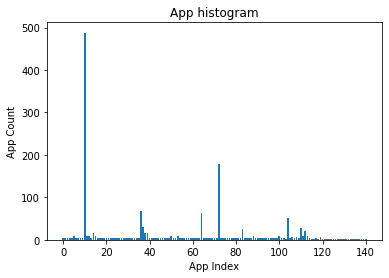

In [124]:
cnt_app = Counter(app_session_df['Process'])
idx_app = range(len(cnt_app))
barlist = plt.bar(idx_app, cnt_app.values())
plt.title("App histogram"); plt.xlabel("App Index"); plt.ylabel("App Count");
cnt_app.most_common(10)

In [122]:
len(cnt_app.keys())

141

In [125]:
app_session_df.shape

(1604, 3)

In [129]:
label2_df = pd.DataFrame(cnt_app.most_common(10))
label2_df.columns = ['App', 'Count']
label2_df.head(10)

,App,Count
0,svchost.exe,488
1,MicrosoftEdgeCP.exe,178
2,conhost.exe,69
3,RuntimeBroker.exe,64
4,Code.exe,51
5,WmiPrvSE.exe,31
6,chrome.exe,27
7,Teams.exe,25
8,python.exe,21
9,LPlatSvc.exe,15


Let's look at the level of ambiguity between the Apps, i.e. at an intersection between work and play Apps:

In [135]:
app_work_df = app_session_df[app_session_df['Label'] == 'work']
app_play_df = app_session_df[app_session_df['Label'] == 'play']

In [142]:
len(set.intersection(set(app_work_df['Process'].values), set(app_play_df['Process'].values)))

115